In [1]:
!pip install pandas
!pip install matplotlib
!pip install folium
!pip install geopy

In [1]:
import pandas as pd
data = pd.read_csv('cheongju_restaurant_data.csv', encoding='cp949')
data.head()

,업종명,업소명,소재지(도로명),소재지(지번),소재지전화,업태명
0,일반음식점,랑성유황오리,청주시 상당구 낭성면 관정1길 10,청주시 상당구 낭성면 관정리 413-10,043-285-6767,기타
1,일반음식점,비에이치씨(BHC)청주용정점,청주시 상당구 영운천로133번길 33 1층 (금천동),청주시 상당구 금천동 452 1층,NaN,호프/통닭
2,일반음식점,BHC방서동남점,청주시 상당구 월평로238번길 3-5 1층 101호 (용암동),청주시 상당구 용암동 2035,043-297-1577,호프/통닭
3,일반음식점,bhc성안점,청주시 상당구 용담로 7 주5동 1층 129호 130호 (문화동 문화동 센트럴...,청주시 상당구 문화동 118 문화동 센트럴칸타빌,NaN,호프/통닭
4,일반음식점,투썸플레이스청주동남점,청주시 상당구 중고개로125번길 19 1~4층 (용암동),청주시 상당구 용암동 189-3 1~4층,043-298-1200,경양식


In [3]:
import folium
c_map = folium.Map(location=[36.6286, 127.4577], zoom_start=15)
c_map.save('./default_cheongju_map.html')

In [4]:
address = data['소재지(도로명)']
print(type(address[0]))
address.head()

<class 'str'>


0                                  청주시 상당구 낭성면 관정1길 10
1                       청주시 상당구 영운천로133번길 33  1층 (금천동)
2                  청주시 상당구 월평로238번길 3-5  1층 101호 (용암동)
3    청주시 상당구 용담로 7  주5동 1층 129호  130호 (문화동  문화동 센트럴...
4                     청주시 상당구 중고개로125번길 19  1~4층 (용암동)
Name: 소재지(도로명), dtype: object

In [5]:
for i in range(len(address)):
    a = str(address[i]).split(' ')
    address[i] = ' '.join(a[0:4])
print(address.head())

0        청주시 상당구 낭성면 관정1길
1    청주시 상당구 영운천로133번길 33
2    청주시 상당구 월평로238번길 3-5
3           청주시 상당구 용담로 7
4    청주시 상당구 중고개로125번길 19
Name: 소재지(도로명), dtype: object


In [6]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y
    except:
        return [0, 0]

In [7]:
latitude = []
longitude = []

for i in range(100):
    a = geocoding(address[i])
    latitude.append(a[0])
    longitude.append(a[1])

temp_data = data[:100]
res_data = pd.DataFrame({'업소명': temp_data['업소명'], '위도': latitude, '경도': longitude})
print(res_data)

                업소명         위도          경도
0            랑성유황오리   0.000000    0.000000
1   비에이치씨(BHC)청주용정점  36.622624  127.511121
2          BHC방서동남점  36.606885  127.509173
3            bhc성안점  36.632477  127.497701
4       투썸플레이스청주동남점   0.000000    0.000000
..              ...        ...         ...
95             정성한줄  36.618122  127.518795
96            장수설렁탕  36.640026  127.489415
97           벌떼호프식당   0.000000    0.000000
98        고향홍굴부추칼국수  36.607065  127.509324
99       새벽집24시정육포차  36.620080  127.512775

[100 rows x 3 columns]


In [8]:
for name, lat, log in zip(res_data.업소명, res_data.위도, res_data.경도):
    if lat == 0 or log == 0: continue
    folium.Marker([lat, log], popup=name).add_to(c_map)
c_map.save('./marked_cheongju_map.html')

In [9]:
for i in range(len(address)):
    a = str(address[i]).split(' ')
    address[i] = ' '.join(a[:2])
    
temp_data = pd.DataFrame({'address': address})
temp_data['count'] = 1
temp_data = temp_data.groupby('address').sum()
temp_data.index = [ 'class', ' ', 'SangDang', 'SeoWon', 'CheongWon', '' ]
print(temp_data.head())

           count
class         31
              98
SangDang    2585
SeoWon      2461
CheongWon   2795


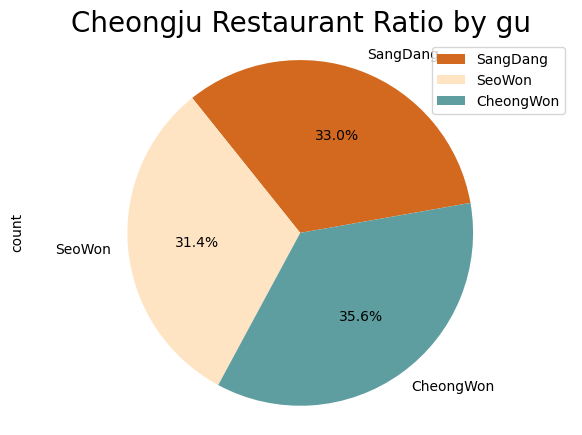

In [10]:
import matplotlib.pyplot as plt
plt.style.use('default')

temp_data = temp_data.loc[['SangDang', 'SeoWon', 'CheongWon']]
temp_data['count'].plot(kind='pie',
                       figsize=(7, 5),
                       autopct='%1.1f%%',
                       startangle=10,
                       colors=['chocolate', 'bisque', 'cadetblue']
                       )
plt.title('Cheongju Restaurant Ratio by gu', size=20)
plt.axis('equal')
plt.legend(labels=temp_data.index, loc='upper right')
plt.show()